# Exploring Philadelphia's Climate: An Analysis of Temperature, Precipitation and Ground Water Level Data

Philadelphia, one of the most historically significant cities in the United States, is situated in the mid-Atlantic region.
It's climate is classified as humid subtropical and is characterized by four distinct seasons with warm, humid summers and cold, damp winters. The city's geographical position along the east coast means it is influenced by a combination of oceanic and continental weather patterns, leading to variability in temperature and precipitation throughout the year. It experiences a climate marked by distinct seasonal variations and evolving weather patterns. It is important to understand these climatic variations for effective management across multiple sectors, including urban development, public health, and environmental conservation. The primary objective of this report is to analyze the historical climate data for Philadelphia, including temperature and precipitation trends, to provide insights into the city's climatic behavior over time. Through this analysis, we aim to equip stakeholders with the insights needed to adapt to and plan for Philadelphia’s changing climate.

For this report we will use Groundwater Level over the period from 2012 to 2024 and temperature and precipitation data over the period from 2000 to 2024.

# Visualizing & Analyzing Ground Water Level Data
U.S. Geological Survey (USGS) offers extensive groundwater level data through the National Water Information System (NWIS), including historical data for Philadelphia. We will import this  data through an API call to the National Water Information System (NWIS) maintained by the U.S. Geological Survey (USGS)using dataretrieval.nwis package.




In [ ]:
!pip install -U dataretrieval
import dataretrieval.nwis as nwis
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [ ]:
# Define site number and date range
site_no = '400229075104601'
start_date = '2012-08-01'
end_date = '2024-08-01'
serv_type = 'dv' ## to get daily values

# Retrieve the data.
data = nwis.get_record(sites=site_no,start=start_date,end=end_date,service=serv_type)
data.head()
# The data is already in a DataFrame format
# The parameter code for Water level, depth is '72019' and for the daily value we will be using '72019_Mean' column.

,site_no,72019_Maximum,72019_Maximum_cd,72019_Minimum,72019_Minimum_cd,72019_Mean,72019_Mean_cd
datetime,,,,,,,
2012-09-05 00:00:00+00:00,400229075104601,17.53,A,17.49,A,17.51,A
2012-09-06 00:00:00+00:00,400229075104601,17.49,A,17.45,A,17.47,A
2012-09-07 00:00:00+00:00,400229075104601,17.46,A,17.42,A,17.43,A
2012-09-08 00:00:00+00:00,400229075104601,17.42,A,17.40,A,17.41,A
2012-09-09 00:00:00+00:00,400229075104601,17.44,A,17.42,A,17.42,A


In [ ]:
# to reset the index
data.reset_index(inplace=True)
data.head()

,datetime,site_no,72019_Maximum,72019_Maximum_cd,72019_Minimum,72019_Minimum_cd,72019_Mean,72019_Mean_cd
0,2012-09-05 00:00:00+00:00,400229075104601,17.53,A,17.49,A,17.51,A
1,2012-09-06 00:00:00+00:00,400229075104601,17.49,A,17.45,A,17.47,A
2,2012-09-07 00:00:00+00:00,400229075104601,17.46,A,17.42,A,17.43,A
3,2012-09-08 00:00:00+00:00,400229075104601,17.42,A,17.40,A,17.41,A
4,2012-09-09 00:00:00+00:00,400229075104601,17.44,A,17.42,A,17.42,A


We need only 'datetime' and '72019_Mean' for our analysis. So, we will select only these two columns.

In [ ]:
# select the required columns
data = data[['datetime','72019_Mean']]
# renaming the columns
data.columns=['date','gwlevel']
data.head()

,date,gwlevel
0,2012-09-05 00:00:00+00:00,17.51
1,2012-09-06 00:00:00+00:00,17.47
2,2012-09-07 00:00:00+00:00,17.43
3,2012-09-08 00:00:00+00:00,17.41
4,2012-09-09 00:00:00+00:00,17.42


In [ ]:
# check the datatype
data.dtypes

,0
date,"datetime64[ns, UTC]"
gwlevel,float64


In [ ]:
# Extracting date from datetime
data['date'] = data['date'].dt.date

<ipython-input-65-b346a9bcd0a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].dt.date


In [ ]:
# get the first 5 rows of the dataframe
data.head()

,date,gwlevel
0,2012-09-05,17.51
1,2012-09-06,17.47
2,2012-09-07,17.43
3,2012-09-08,17.41
4,2012-09-09,17.42


In [ ]:
# summary of the data
data.describe()

,gwlevel
count,4286.000000
mean,15.338766
std,0.963568
min,10.900000
25%,14.760000
50%,15.320000
75%,16.000000
max,17.720000


In [ ]:
# Find the start and end dates
start_date = data['date'].min()
end_date = data['date'].max()
print('Start Date',start_date)
print('End Date',end_date)

Start Date 2012-09-05
End Date 2024-08-01


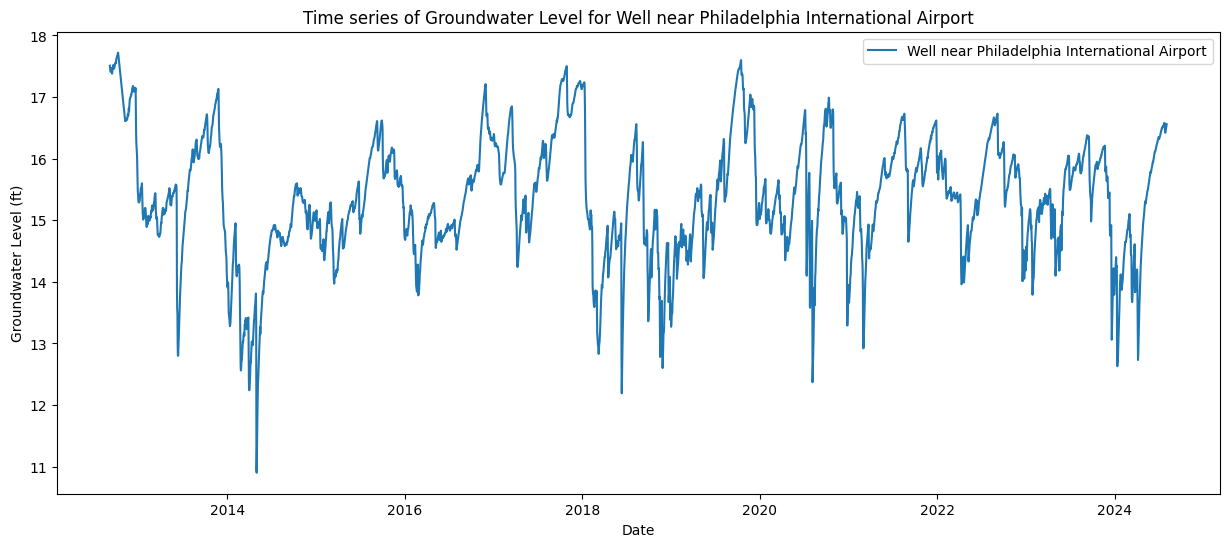

In [ ]:
# ground water level plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(data['date'], data['gwlevel'],label='Well near Philadelphia International Airport')
plt.xlabel('Date')
plt.ylabel('Groundwater Level (ft)')
plt.title('Time series of Groundwater Level for Well near Philadelphia International Airport')
plt.legend()
plt.show()

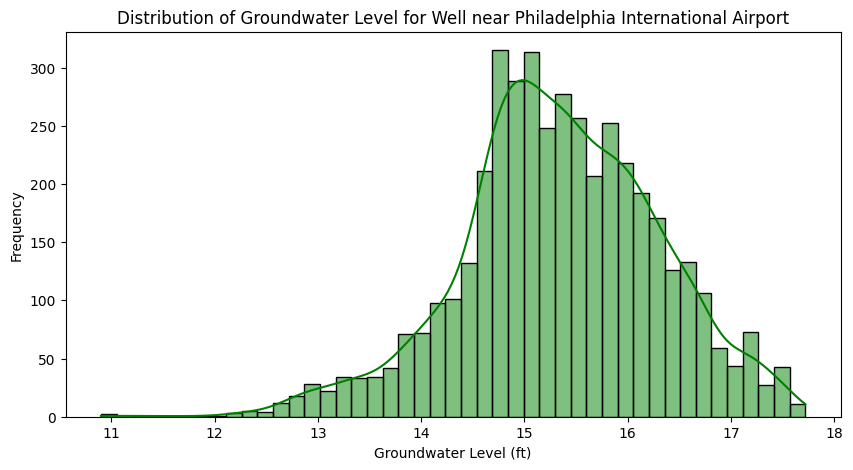

In [ ]:
# Plotting distribution of Groundwater Level for Well near Philadelphia International Airport
fig = plt.figure(figsize=(10,5))
sns.histplot(data['gwlevel'],kde=True,color='green')
plt.title('Distribution of Groundwater Level for Well near Philadelphia International Airport')
plt.xlabel('Groundwater Level (ft)')
plt.ylabel('Frequency')
plt.show()


*   In the time series plot there is high variability in Groundwater Level over the period from 2012 to 2024 but we can see peaks and troughs indicating cyclic variations. Seasonal variations in rainfall can affect groundwater levels. During wetter periods, groundwater levels may rise, reducing the depth required to reach the water table.  During dry periods, levels may fall.

*   In the histogram groundwater levels are left skewed. The tail represents lower groundwater levels that occur less frequently compared to higher groundwater levels (we need to go more deep inside the ground to extract water).
The shallower water levels (to the left of the peak) are less frequent and might have been due to exceptional conditions such as periods of high precipitation or increased aquifer recharge.





# Visualizing & Analyzing Air Temperature and Precipitation Data
First, we will read the temperature and precipitation data for Philadelphia International Airport Station into a pandas dataframe. We imported the data from https://www.ncdc.noaa.gov/cdo-web/search from 2000-08-01 to 2024-08-01

In [ ]:
# import the data into pandas dataframe
tpdata = pd.read_csv("/content/TempPrecipDataPhilly.csv")
tpdata.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-01,0.01,80.0,86,74
1,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-02,0.28,81.0,88,73
2,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-03,0.04,78.0,83,73
3,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-04,0.05,77.0,83,71
4,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-05,0.00,73.0,81,65


Let us check the start and end date of the data in our dataframe.

In [ ]:
# Find the start and end dates
start_date = tpdata['DATE'].min()
end_date = tpdata['DATE'].max()
print('Start Date',start_date)
print('End Date',end_date)

Start Date 2000-08-01
End Date 2024-08-01


In [ ]:
# get the summary of the data
tpdata.describe()

,PRCP,TAVG,TMAX,TMIN
count,8767.000000,5750.000000,8767.000000,8767.000000
mean,0.125164,58.229217,65.613893,48.701266
std,0.368875,16.857263,18.457114,16.901253
min,0.000000,0.000000,13.000000,2.000000
25%,0.000000,45.000000,50.000000,35.000000
50%,0.000000,59.000000,67.000000,49.000000
75%,0.040000,73.000000,82.000000,64.000000
max,8.020000,91.000000,103.000000,83.000000


Let us check the datatype of thhe columns of the dataframe.

In [ ]:
tpdata.dtypes

,0
STATION,object
NAME,object
DATE,object
PRCP,float64
TAVG,float64
TMAX,int64
TMIN,int64


We see that 'DATE' is stored as an object. We need to convert this to datetime.

In [ ]:
# Convert 'DATE' column to datetime format
tpdata['DATE'] = pd.to_datetime(tpdata['DATE'])

Now we will check if our data has any missing values.

In [ ]:
# check if there are any missing values
tpdata.isnull().sum()

,0
STATION,0
NAME,0
DATE,0
PRCP,0
TAVG,3017
TMAX,0
TMIN,0


From the above table we see that the TAVG column has 3017 missing values. Let us try to find the rows with missing values.

In [ ]:
# find the rows with missing values
rows_with_nulls = tpdata[tpdata.isnull().any(axis=1)]
print(rows_with_nulls)

          STATION                                       NAME       DATE  PRCP  \
461   USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2001-11-05  0.00   
462   USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2001-11-06  0.00   
828   USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2002-11-07  0.01   
973   USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2003-04-01  0.01   
1279  USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2004-02-01  0.00   
...           ...                                        ...        ...   ...   
5657  USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2016-01-27  0.00   
5658  USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2016-01-28  0.00   
5659  USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2016-01-29  0.00   
5660  USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2016-01-30  0.00   
5661  USW00013739  PHILADELPHIA INTERNATIONAL AIRPORT, PA US 2016-01-31  0.00   

      TAVG  TMAX  TMIN  
46

On analyzing the data we find that TAVG is the average of TMAX and TMIN rounded to nearest integer. So we can impute the missing values with the average of TMAX and TMIN rounded to the nearest integer.

In [ ]:
# Calculate the average of TMIN and TMAX, and round to the nearest integer
tpdata['TAVGcalc'] = tpdata[['TMIN', 'TMAX']].mean(axis=1).round()

# Replace missing values in TAVG column with the rounded average
tpdata['TAVG'].fillna(tpdata['TAVGcalc'], inplace=True)

# Drop the TAVGcalc column
tpdata.drop(columns=['TAVGcalc'], inplace=True)


In [ ]:
# check if there are any missing values
tpdata.isnull().sum()

,0
STATION,0
NAME,0
DATE,0
PRCP,0
TAVG,0
TMAX,0
TMIN,0


From the above table we can see that now our data has no missing values.

In [ ]:
tpdata.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-01,0.01,80.0,86,74
1,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-02,0.28,81.0,88,73
2,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-03,0.04,78.0,83,73
3,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-04,0.05,77.0,83,71
4,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2000-08-05,0.00,73.0,81,65


Now let us create the histogram for temperature and precipitation.

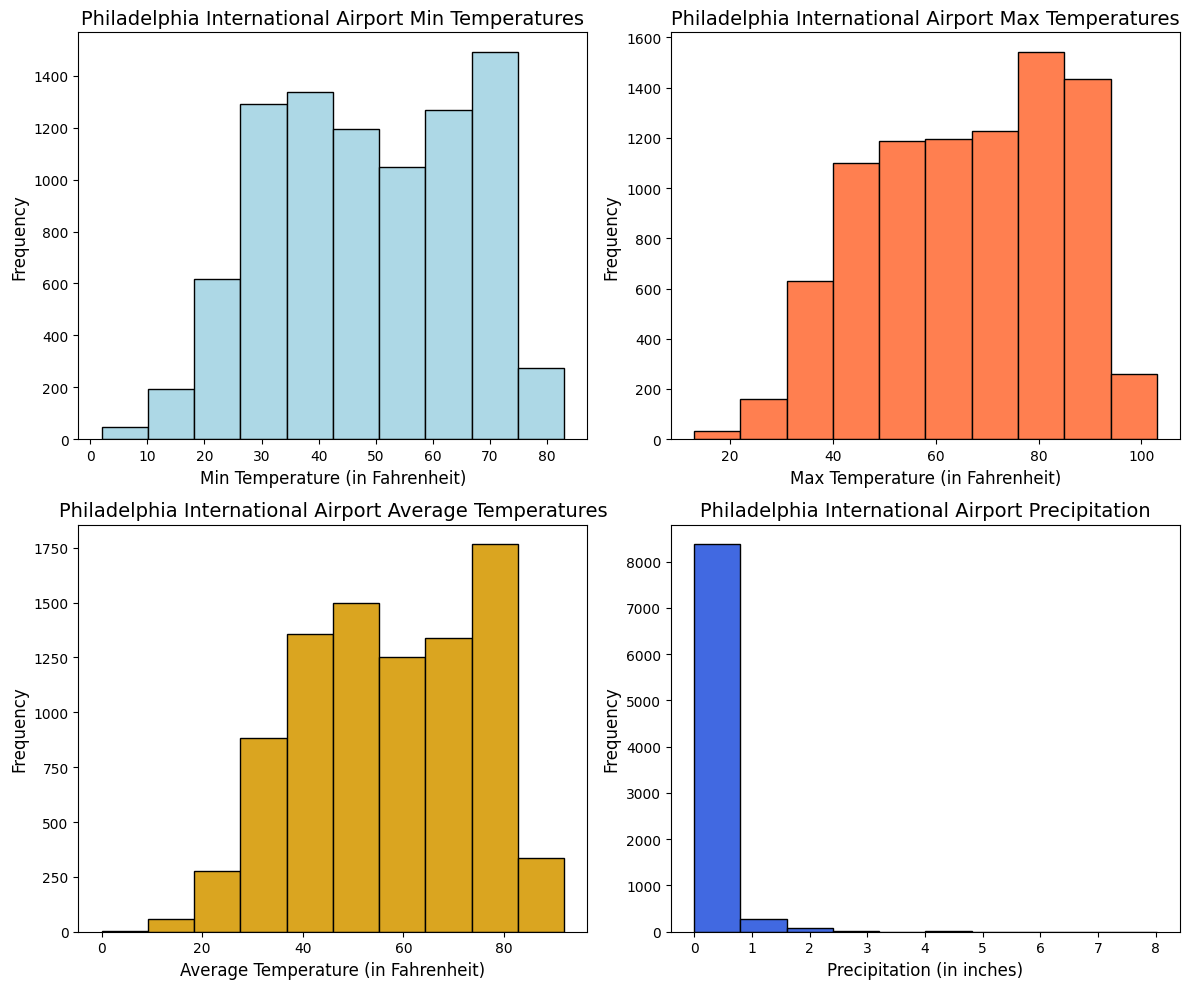

In [ ]:
# Create histograms for all columns in the DataFrame
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot histograms
tpdata.hist(column='TMIN', ax=axes[0, 0], bins=10, color='lightblue', edgecolor='black')
tpdata.hist(column='TMAX', ax=axes[0, 1], bins=10, color='coral', edgecolor='black')
tpdata.hist(column='TAVG', ax=axes[1, 0], bins=10, color='goldenrod', edgecolor='black')
tpdata.hist(column='PRCP', ax=axes[1, 1], bins=10, color='royalblue', edgecolor='black')

# Set titles and labels
axes[0, 0].set_title('Philadelphia International Airport Min Temperatures', fontsize=14)
axes[0, 0].set_xlabel('Min Temperature (in Fahrenheit)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

axes[0, 1].set_title('Philadelphia International Airport Max Temperatures', fontsize=14)
axes[0, 1].set_xlabel('Max Temperature (in Fahrenheit)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

axes[1, 0].set_title('Philadelphia International Airport Average Temperatures', fontsize=14)
axes[1, 0].set_xlabel('Average Temperature (in Fahrenheit)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

axes[1, 1].set_title('Philadelphia International Airport Precipitation', fontsize=14)
axes[1, 1].set_xlabel('Precipitation (in inches)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Hide grid lines for all subplots
for ax in axes.flatten():
    ax.grid(False)
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

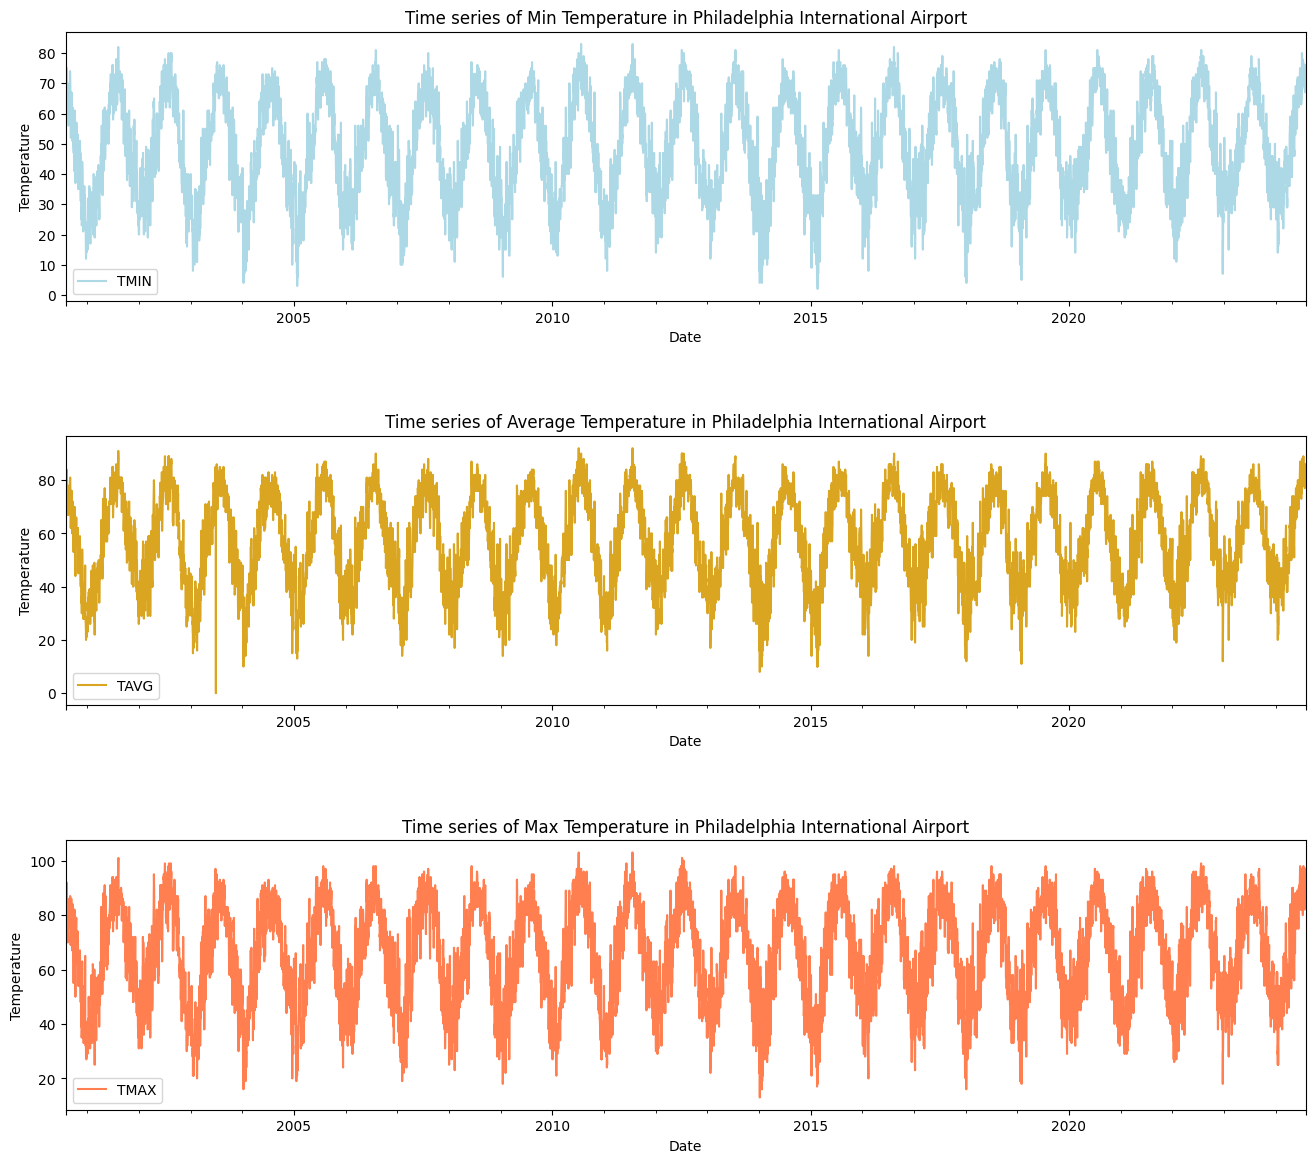

In [ ]:
# creating time series plot for temperature
fig,ax = plt.subplots(3,1,figsize=(16,14))
plt.subplots_adjust(hspace=0.5)

tpdata.plot('DATE','TMIN',ax=ax[0],color='lightblue')
ax[0].set_title('Time series of Min Temperature in Philadelphia International Airport')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Temperature')

tpdata.plot('DATE','TAVG',ax=ax[1],color='goldenrod')
ax[1].set_title('Time series of Average Temperature in Philadelphia International Airport')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Temperature')

tpdata.plot('DATE','TMAX',ax=ax[2],color='coral')
ax[2].set_title('Time series of Max Temperature in Philadelphia International Airport')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Temperature')

plt.show()

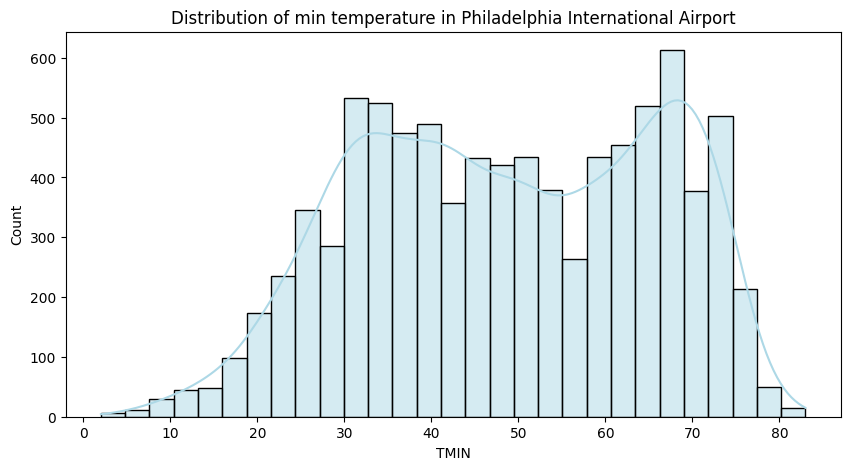

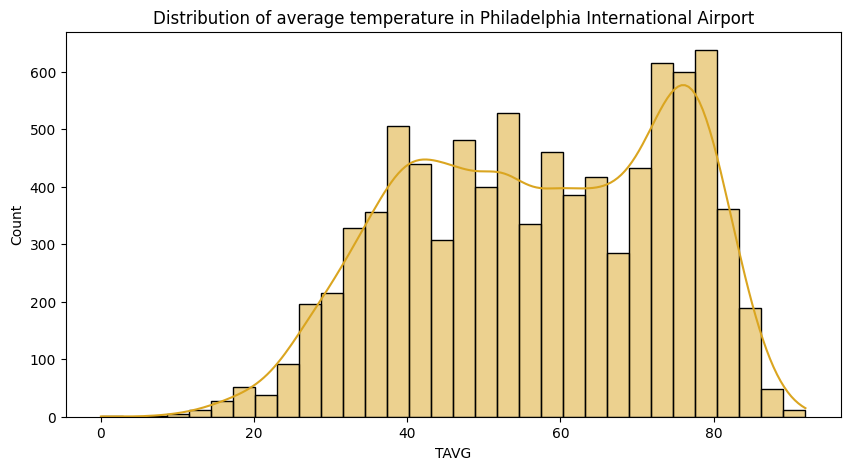

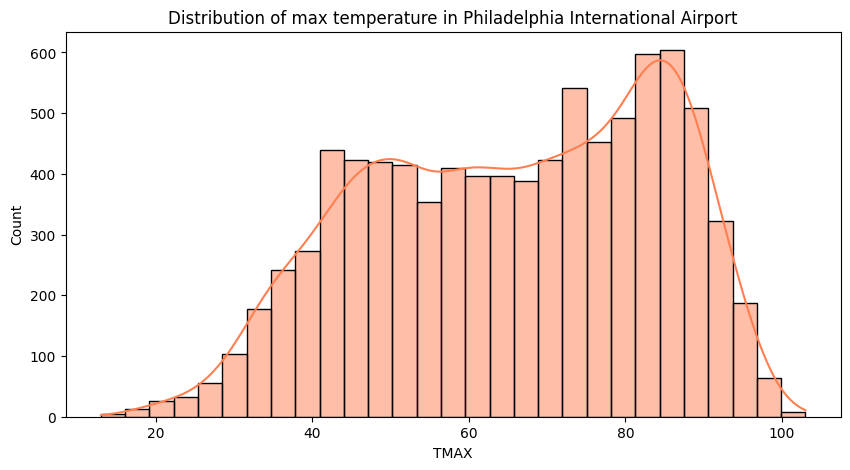

In [ ]:
# distribution of min, avg and max temperature

fig = plt.figure(figsize=(10,5))
sns.histplot(tpdata['TMIN'],kde=True,color='lightblue')
plt.title('Distribution of min temperature in Philadelphia International Airport')
plt.show()

fig = plt.figure(figsize=(10,5))
sns.histplot(tpdata['TAVG'],kde=True,color='goldenrod')
plt.title('Distribution of average temperature in Philadelphia International Airport')
plt.show()

fig = plt.figure(figsize=(10,5))
sns.histplot(tpdata['TMAX'],kde=True,color='coral')
plt.title('Distribution of max temperature in Philadelphia International Airport')
plt.show()

Next, let us compare the maximum temperature over all of Philadelphia International Airport area on days when it rained vs days when it did not rain.

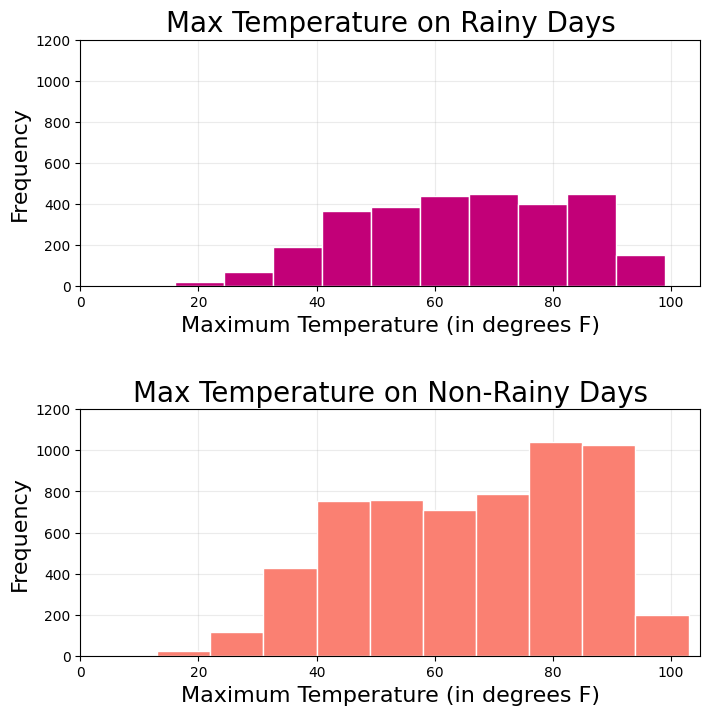

In [ ]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# --------------------------------------
# Plot histogram for Rainy Days
# --------------------------------------
tpdata.loc[tpdata["PRCP"] > 0].hist(column="TMAX",ax=axes[0], facecolor="#C20078", edgecolor="white")

# Add titles and labels
axes[0].set_title("Max Temperature on Rainy Days", fontsize=20)
axes[0].set_xlabel("Maximum Temperature (in degrees F)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for Non-Rainy Days
# --------------------------------------
tpdata.loc[tpdata["PRCP"]==0].hist(column="TMAX",ax=axes[1], facecolor="salmon", edgecolor="white")

# Add titles and labels
axes[1].set_title("Max Temperature on Non-Rainy Days", fontsize=20)
axes[1].set_xlabel("Maximum Temperature (in degrees F)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable
# --------------------------------------

# Set x and y axis limits to match
axes[0].set_xlim([0,105])
axes[1].set_xlim([0,105])
axes[0].set_ylim([0,1200])
axes[1].set_ylim([0,1200]);

# Adjust vertical space so titles/axis labels don't overlap
fig.subplots_adjust(hspace=.5)

Now let us compare the minimum temperature over all of Philadelphia International Airport area on days when it rained vs days when it did not rain.

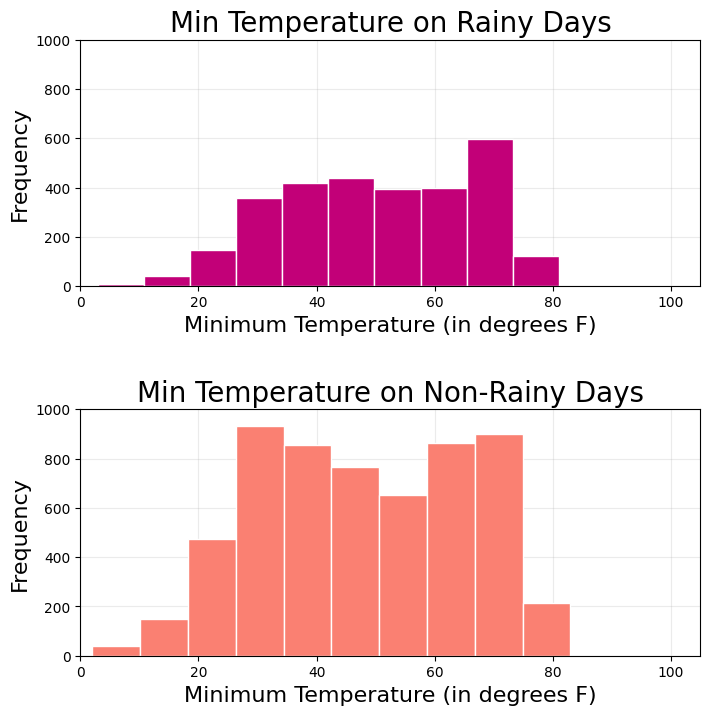

In [ ]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# --------------------------------------
# Plot histogram for Rainy Days
# --------------------------------------
tpdata.loc[tpdata["PRCP"] > 0].hist(column="TMIN",ax=axes[0], facecolor="#C20078", edgecolor="white")

# Add titles and labels
axes[0].set_title("Min Temperature on Rainy Days", fontsize=20)
axes[0].set_xlabel("Minimum Temperature (in degrees F)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for Non-Rainy Days
# --------------------------------------
tpdata.loc[tpdata["PRCP"]==0].hist(column="TMIN",ax=axes[1], facecolor="salmon", edgecolor="white")

# Add titles and labels
axes[1].set_title("Min Temperature on Non-Rainy Days", fontsize=20)
axes[1].set_xlabel("Minimum Temperature (in degrees F)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable
# --------------------------------------

# Set x and y axis limits to match
axes[0].set_xlim([0,105])
axes[1].set_xlim([0,105])
axes[0].set_ylim([0,1000])
axes[1].set_ylim([0,1000]);

# Adjust vertical space so titles/axis labels don't overlap
fig.subplots_adjust(hspace=.5)

Now let us compare the average temperature over all of Philadelphia International Airport area on days when it rained vs days when it did not rain.

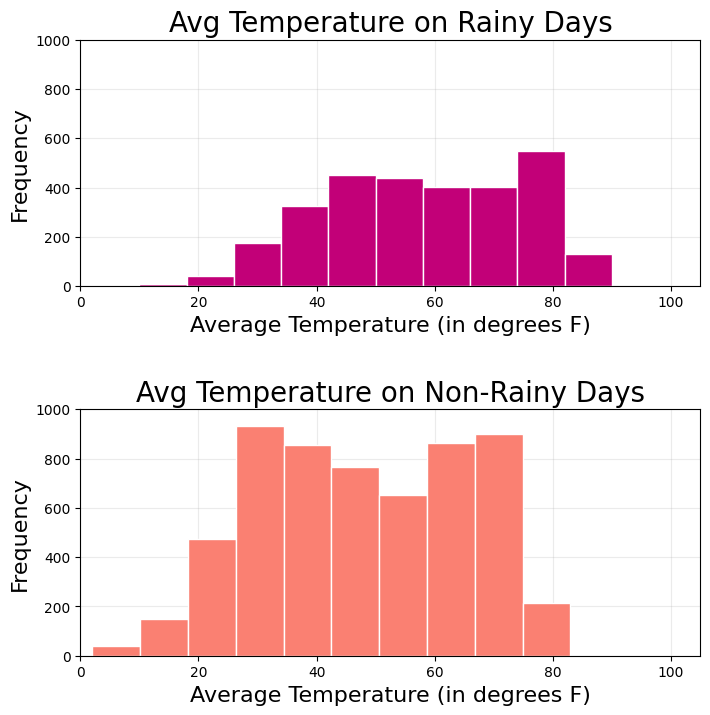

In [ ]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# --------------------------------------
# Plot histogram for Rainy Days
# --------------------------------------
tpdata.loc[tpdata["PRCP"] > 0].hist(column="TAVG",ax=axes[0], facecolor="#C20078", edgecolor="white")

# Add titles and labels
axes[0].set_title("Avg Temperature on Rainy Days", fontsize=20)
axes[0].set_xlabel("Average Temperature (in degrees F)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for Non-Rainy Days
# --------------------------------------
tpdata.loc[tpdata["PRCP"]==0].hist(column="TMIN",ax=axes[1], facecolor="salmon", edgecolor="white")

# Add titles and labels
axes[1].set_title("Avg Temperature on Non-Rainy Days", fontsize=20)
axes[1].set_xlabel("Average Temperature (in degrees F)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable
# --------------------------------------

# Set x and y axis limits to match
axes[0].set_xlim([0,105])
axes[1].set_xlim([0,105])
axes[0].set_ylim([0,1000])
axes[1].set_ylim([0,1000]);

# Adjust vertical space so titles/axis labels don't overlap
fig.subplots_adjust(hspace=.5)

Next, let us plot time series of precipitation for Philadelphia International Airport area.

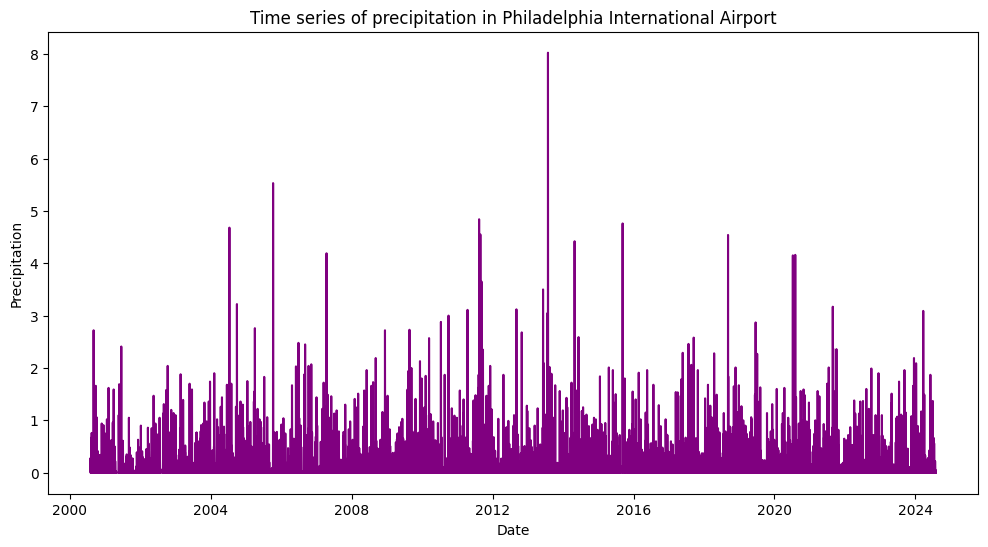

In [ ]:
# creating time series plot for precipitation
import matplotlib.dates as mdates
fig = plt.figure(figsize=(12,6))
plt.plot('DATE','PRCP',data=tpdata,color='purple')
plt.title('Time series of precipitation in Philadelphia International Airport')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.show()

Let us look at the distribution of precipitation

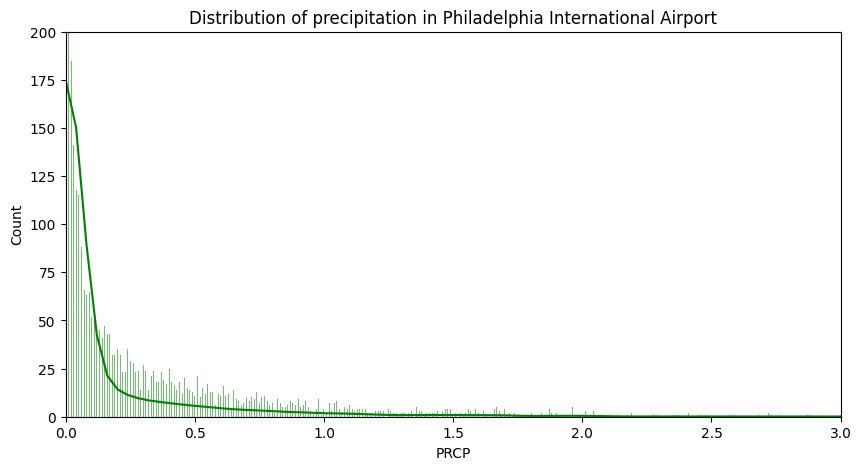

In [ ]:
# distribution of precipitation

fig = plt.figure(figsize=(10,5))
sns.histplot(tpdata['PRCP'],kde=True,color='green')
plt.title('Distribution of precipitation in Philadelphia International Airport')
# Set y axis limits to match
plt.xlim(0,3)
plt.ylim(0, 200)
plt.show()

## Findings for precipitation
*   There is high variability in precipitation over the period from 2000 to 2024.

*   Several distinct peak precipitation events are visible, with the highest peak occuring around 2014.

*   The vast majority of precipitation measurements are low, indicating low precipitation events are extremely common.



## Findings for temperature
*   There is a strong seasonal trend, with the temperatures fluctuating in a regular yearly cycle over the period from 2000 to 2024.

*   There is no drastic change in the minimum, average or maximum temerature trend over the years.

*   The distributions are bimodal, indicating the presence of two different temperature regimes or seasons. We see one peak in the histogram corresponding to summer temperatures and another peak corresponding to winter temperatures.

*   Maximum temperature on non-rainy days is more compared to the temperature on rainy days.

*   The distribution of temperature on non-rainy days is bimodal indicating the presence of two different temperature regimes or seasons.


## Findings for Ground Water Level
*   In the time series plot there is high variability in Groundwater Level over the period from 2012 to 2024 but we can see peaks and troughs indicating cyclic variations. Seasonal variations in rainfall can affect groundwater levels. During wetter periods, groundwater levels may rise, reducing the depth required to reach the water table. During dry periods, levels may fall.

*   In the histogram groundwater levels are left skewed. The tail represents lower groundwater levels that occur less frequently compared to higher groundwater levels (we need to go more deep inside the ground to extract water). The shallower water levels (to the left of the peak) are less frequent and might have been due to exceptional conditions such as periods of high precipitation or increased aquifer recharge.

## Conclusion
This report has provided an analysis of Philadelphia's climate, revealing significant insights into historical patterns and recent trends. Seasonal temperature variations remain pronounced, with notable differences between warmer and colder periods of the year. The frequency of extreme temperature events has increased. Historical precipitation data reveals fluctuations in rainfall and snowfall. Continued monitoring of climate data is essential to track ongoing trends and adapt strategies accordingly. By leveraging the insights provided in this report, stakeholders can make informed decisions to mitigate risks and capitalize on opportunities presented by a changing climate.

## References

[1] NOAA's Climate Data Online Portal
https://www.ncdc.noaa.gov/cdo-web/search

[2]  USGS National Water Dashboard
https://dashboard.waterdata.usgs.gov/app/nwd/en/?aoi=default